In [548]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# model imports
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [549]:
data = pd.read_csv("../measurements")
data = data.loc(axis=1)["Variety", "FreshWeightShoot", "DryWeightShoot", "Height", "Diameter", "LeafArea", "Week"]
data.head()

,Variety,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea,Week
229,Satine,2.6,0.14,8.2,12.0,80.6,2021-W1
362,Satine,2.1,0.10,8.5,8.2,67.4,2021-W1
258,Satine,2.0,0.09,7.5,9.5,65.0,2021-W1
263,Satine,2.7,0.13,6.0,10.6,78.7,2021-W1
224,Lugano,2.3,0.11,8.3,9.8,73.9,2021-W1


In [550]:
def prepare_dataframe(df, variety="", dummy=True):

    if dummy:
        df    = pd.get_dummies(df, columns=['Variety'])
    else :
        df = df.loc[df["Variety"] == variety]
        df = df.loc(axis=1)["FreshWeightShoot", "DryWeightShoot", "Height", "Diameter", "LeafArea", "Week"]

    # remove string from week number
    df['Week'] = df['Week'].str.replace('2021-W', '')
    df['Week'] = pd.to_numeric(df["Week"])

    return df

In [551]:
def split_data(df, test_size, shuffle):
    y = df["Week"].values
    X = df.drop(["Week"], axis=1).values


    return train_test_split(X, y, test_size=test_size, shuffle=shuffle)

In [552]:
def create_fit_model(X_train, y_train):

    model = linear_model.LinearRegression()
    model = model.fit(X_train,y_train)
    return model


In [553]:
def plot_true_vs_predicted(predicted, y, title):
    actual = y
    plt.plot(actual, 'bo')
    plt.plot(predicted, 'r^')

    # Draw lines between the data points
    for x1, y1, x2, y2 in zip(range(len(actual)), actual, range(len(predicted)), predicted):
        plt.plot([x1, x2], [y1, y2], 'k-')

    plt.title(title)
    plt.legend(['True data', 'Predicted data'])
    plt.show()


In [554]:
def print_all_metrics(predictions, y_test):
    mse = mean_squared_error(predictions, y_test)
    mae = mean_absolute_error(predictions, y_test)

    print(f'mean squared error: {mse}')
    print(f'mean absolute erorr: {mae}')


In [555]:
def evaluate_model(metrics, model, y_test, X_test, title):
    prediction = model.predict(X_test)
    print_all_metrics(prediction, y_test)
    plot_true_vs_predicted(prediction, y_test, title)


mean squared error: 0.39352699745640973
mean absolute erorr: 0.4847393770730938


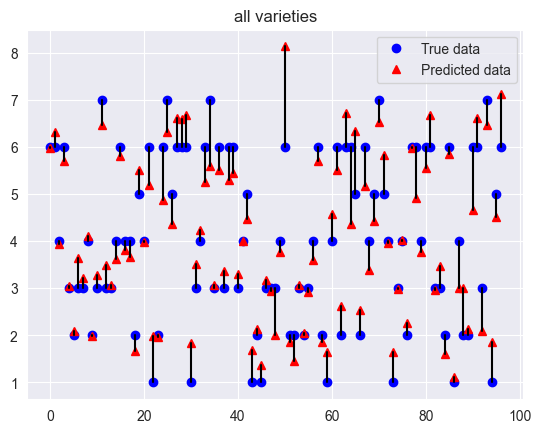

In [556]:
df = prepare_dataframe(data, dummy=True)
X_train, X_test, y_train, y_test = split_data(df, 0.25, True)

model = create_fit_model(X_train, y_train)
evaluate_model([mean_squared_error, mean_absolute_error], model, y_test, X_test, "all varieties")

mean squared error: 0.5203100124921289
mean absolute erorr: 0.5502082572183985


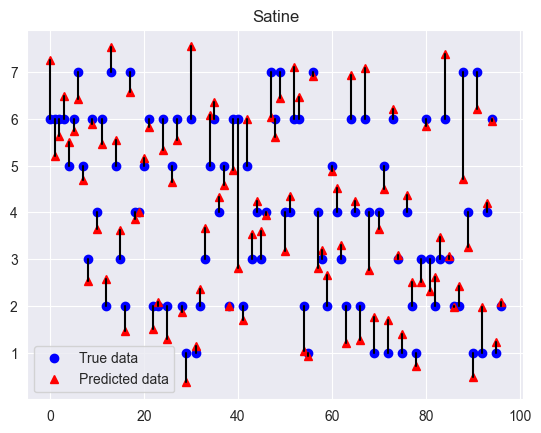

mean squared error: 0.33159593856278785
mean absolute erorr: 0.45152682302611546


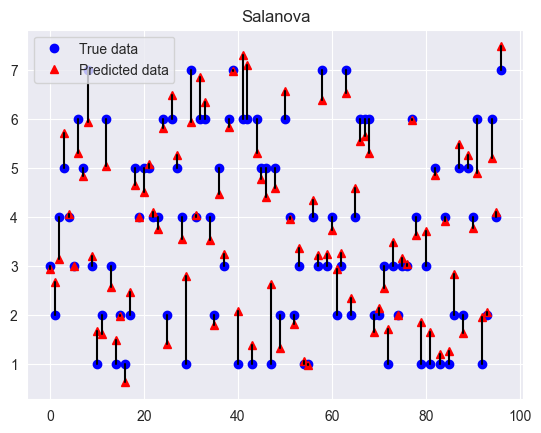

mean squared error: 0.4115248037424418
mean absolute erorr: 0.5002174505516176


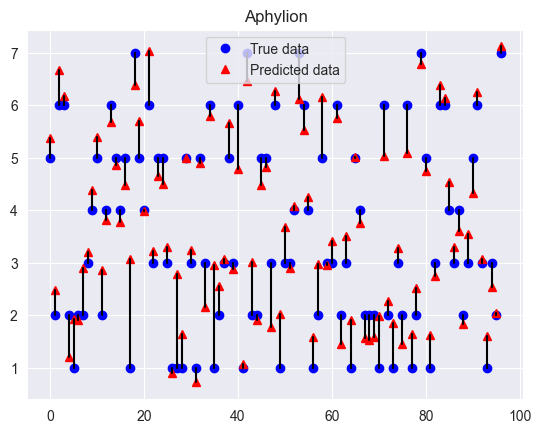

mean squared error: 0.40720173268478593
mean absolute erorr: 0.5044412118899552


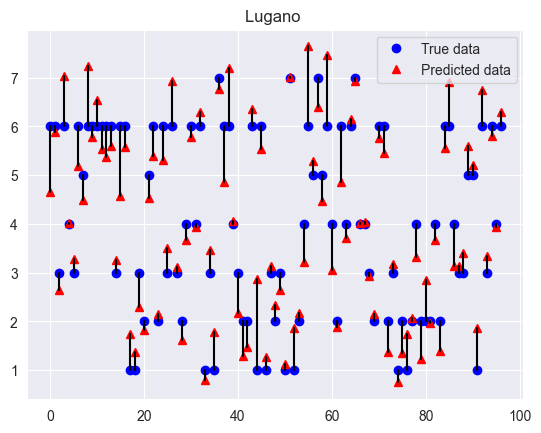

In [557]:
varieties = ["Satine", "Salanova", "Aphylion", "Lugano " ]

for variety in varieties:
    df = prepare_dataframe(data, variety )
    X_train, X_test, y_train, y_test = split_data(df, 0.25, True)
    model = create_fit_model(X_train, y_train)
    evaluate_model([mean_squared_error, mean_absolute_error], model, y_test, X_test, variety)
